In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, pearsonr, f_oneway, shapiro
import warnings

In [46]:
movies=pd.read_csv('movies.csv',encoding='ISO-8859-1')

In [47]:
movies.head()

,Movie_id,Title,Type,Description,Release_Year,Age_Certification,Runtime,Genres,Production_Countries,Seasons,Imdb_ID,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,requires._subscription
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,NaN
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357,NaN
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433,NaN
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600,NaN
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400,NaN


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Movie_id                10873 non-null  object 
 1   Title                   10873 non-null  object 
 2   Type                    10873 non-null  object 
 3   Description             10729 non-null  object 
 4   Release_Year            10873 non-null  int64  
 5   Age_Certification       3688 non-null   object 
 6   Runtime                 10873 non-null  int64  
 7   Genres                  10873 non-null  object 
 8   Production_Countries    10873 non-null  object 
 9   Seasons                 1551 non-null   float64
 10  Imdb_ID                 10172 non-null  object 
 11  Imdb_Score              9765 non-null   float64
 12  Imdb_Votes              9753 non-null   float64
 13  Tmdb_Popularity         10302 non-null  float64
 14  Tmdb_Score              8747 non-null 

In [49]:
movies.describe()

,Release_Year,Runtime,Seasons,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,requires._subscription
count,10873.000000,10873.000000,1551.000000,9765.000000,9.753000e+03,10302.000000,8747.000000,0.0
mean,2004.077807,85.869033,2.661509,5.970558,8.973232e+03,7.614083,5.977729,NaN
std,24.883711,34.156332,3.719633,1.362815,4.897767e+04,45.845289,1.512941,NaN
min,1912.000000,0.000000,1.000000,1.100000,5.000000e+00,0.000153,0.500000,NaN
25%,2002.000000,65.000000,1.000000,5.100000,1.190000e+02,1.327250,5.066500,NaN
50%,2015.000000,89.000000,1.000000,6.100000,4.880000e+02,2.658500,6.000000,NaN
75%,2019.000000,102.000000,3.000000,7.000000,2.493000e+03,6.185000,6.983000,NaN
max,2023.000000,940.000000,53.000000,9.900000,2.081757e+06,3187.531000,10.000000,NaN


In [50]:
movies.isnull().sum()

Movie_id                      0
Title                         0
Type                          0
Description                 144
Release_Year                  0
Age_Certification          7185
Runtime                       0
Genres                        0
Production_Countries          0
Seasons                    9322
Imdb_ID                     701
Imdb_Score                 1108
Imdb_Votes                 1120
Tmdb_Popularity             571
Tmdb_Score                 2126
requires._subscription    10873
dtype: int64

In [51]:
actors=pd.read_csv('actors.csv',encoding='ISO-8859-1')

In [52]:
actors.head()

,actor_id,actor_name,date_of_birth,nationality,biography
0,25020,James Stewart,1970/12/24,Japanese,NaN
1,26190,Donna Reed,1966/11/22,Canadian,NaN
2,25653,Lionel Barrymore,1989/6/20,British,NaN
3,13301,Thomas Mitchell,1936/12/18,French,NaN
4,34171,Henry Travers,1985/7/21,British,NaN


In [53]:
movie_actors=pd.read_csv('movie_actors.csv',encoding='ISO-8859-1')

In [54]:
movie_actors.head()

,Movie_id,Actor_id,Character
0,tm87233,25020,George Bailey
1,tm87233,26190,Mary Hatch
2,tm87233,25653,Mr. Potter
3,tm87233,13301,Uncle Billy
4,tm87233,34171,Clarence


In [55]:
ratings=pd.read_csv('ratings.csv',encoding='ISO-8859-1')

In [56]:
ratings.head()

,Rating_ID,User_ID,Movie_id,Rating_Value,rated_at
0,1,879,tm29973,5.8,2025/9/22
1,2,1633,tm24285,7.6,2025/9/11
2,3,1771,tm18496,8.0,2025/7/21
3,4,82,tm30996,6.9,2024/12/10
4,5,1459,tm432901,7.3,2025/10/15


In [70]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating_ID     5500 non-null   int64  
 1   User_ID       5500 non-null   int64  
 2   Movie_id      5500 non-null   object 
 3   Rating_Value  5500 non-null   float64
 4   rated_at      5500 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 215.0+ KB


In [57]:
subscription=pd.read_csv('subscription.csv',encoding='ISO-8859-1')

In [58]:
subscription.head()

,Subscription_ID,User_ID,plan_name,Start_Date,End_Date,Status
0,10001,1,Standard,2022/1/15,2023/1/15,Active
1,10002,3,Premium,2025/4/15,2026/4/15,Active
2,10003,5,Basic,2024/4/29,2025/4/29,Active
3,10004,6,Basic,2023/11/2,2024/11/1,Active
4,10005,7,Standard,2023/4/9,2024/4/8,Active


In [59]:
users=pd.read_csv('users.csv',encoding='ISO-8859-1')

In [60]:
users.head()

,User_ID,username,Email,Registration_Date,Age,Country_Code,Gender,phone_number
0,1,MarySmith,mary.smith1@gmail.com,2022/1/3,28,CA,Male,NaN
1,2,BarbaraRodriguez,barbara.rodriguez2@gmail.com,2023/10/27,57,CA,Male,NaN
2,3,MichaelWilliams,michael.williams3@yahoo.com,2025/4/2,61,UK,Male,NaN
3,4,LindaDavis,linda.davis4@gmail.com,2021/10/21,44,US,Female,NaN
4,5,ElizabethRodriguez,elizabeth.rodriguez5@yahoo.com,2024/4/29,66,AU,Female,NaN


In [61]:
watch_history=pd.read_csv('watch_history.csv',encoding='ISO-8859-1')

In [62]:
watch_history.head()

,watch_id,User_ID,Movie_id,Start_time,End_time,Watch_duration_seconds
0,1,1804,tm1294606,2025/4/3 20:04,2025/4/3 21:14,4200
1,2,1666,tm625352,2024/8/11 15:11,2024/8/11 16:13,3720
2,3,17,tm331706,2024/3/21 0:38,2024/3/21 1:43,3900
3,4,422,tm109828,2025/3/29 2:17,2025/3/29 3:02,2675
4,5,1465,tm12713,2025/4/15 22:14,2025/4/15 23:02,2880


DIMENSION 1: MOVIE POPULARITY VS RATINGS ANALYSIS
Movies table columns: ['Movie_id', 'Title', 'Type', 'Description', 'Release_Year', 'Age_Certification', 'Runtime', 'Genres', 'Production_Countries', 'Seasons', 'Imdb_ID', 'Imdb_Score', 'Imdb_Votes', 'Tmdb_Popularity', 'Tmdb_Score', 'requires._subscription']
Ratings table columns: ['Rating_ID', 'User_ID', 'Movie_id', 'Rating_Value', 'rated_at']
Total movies: 10873
Movies with ≥3 ratings: 158
TMDB Popularity Statistics:
  Range: 0.000 - 208.089
  Median: 2.422
  Mean: 6.642
  75th percentile: 5.643


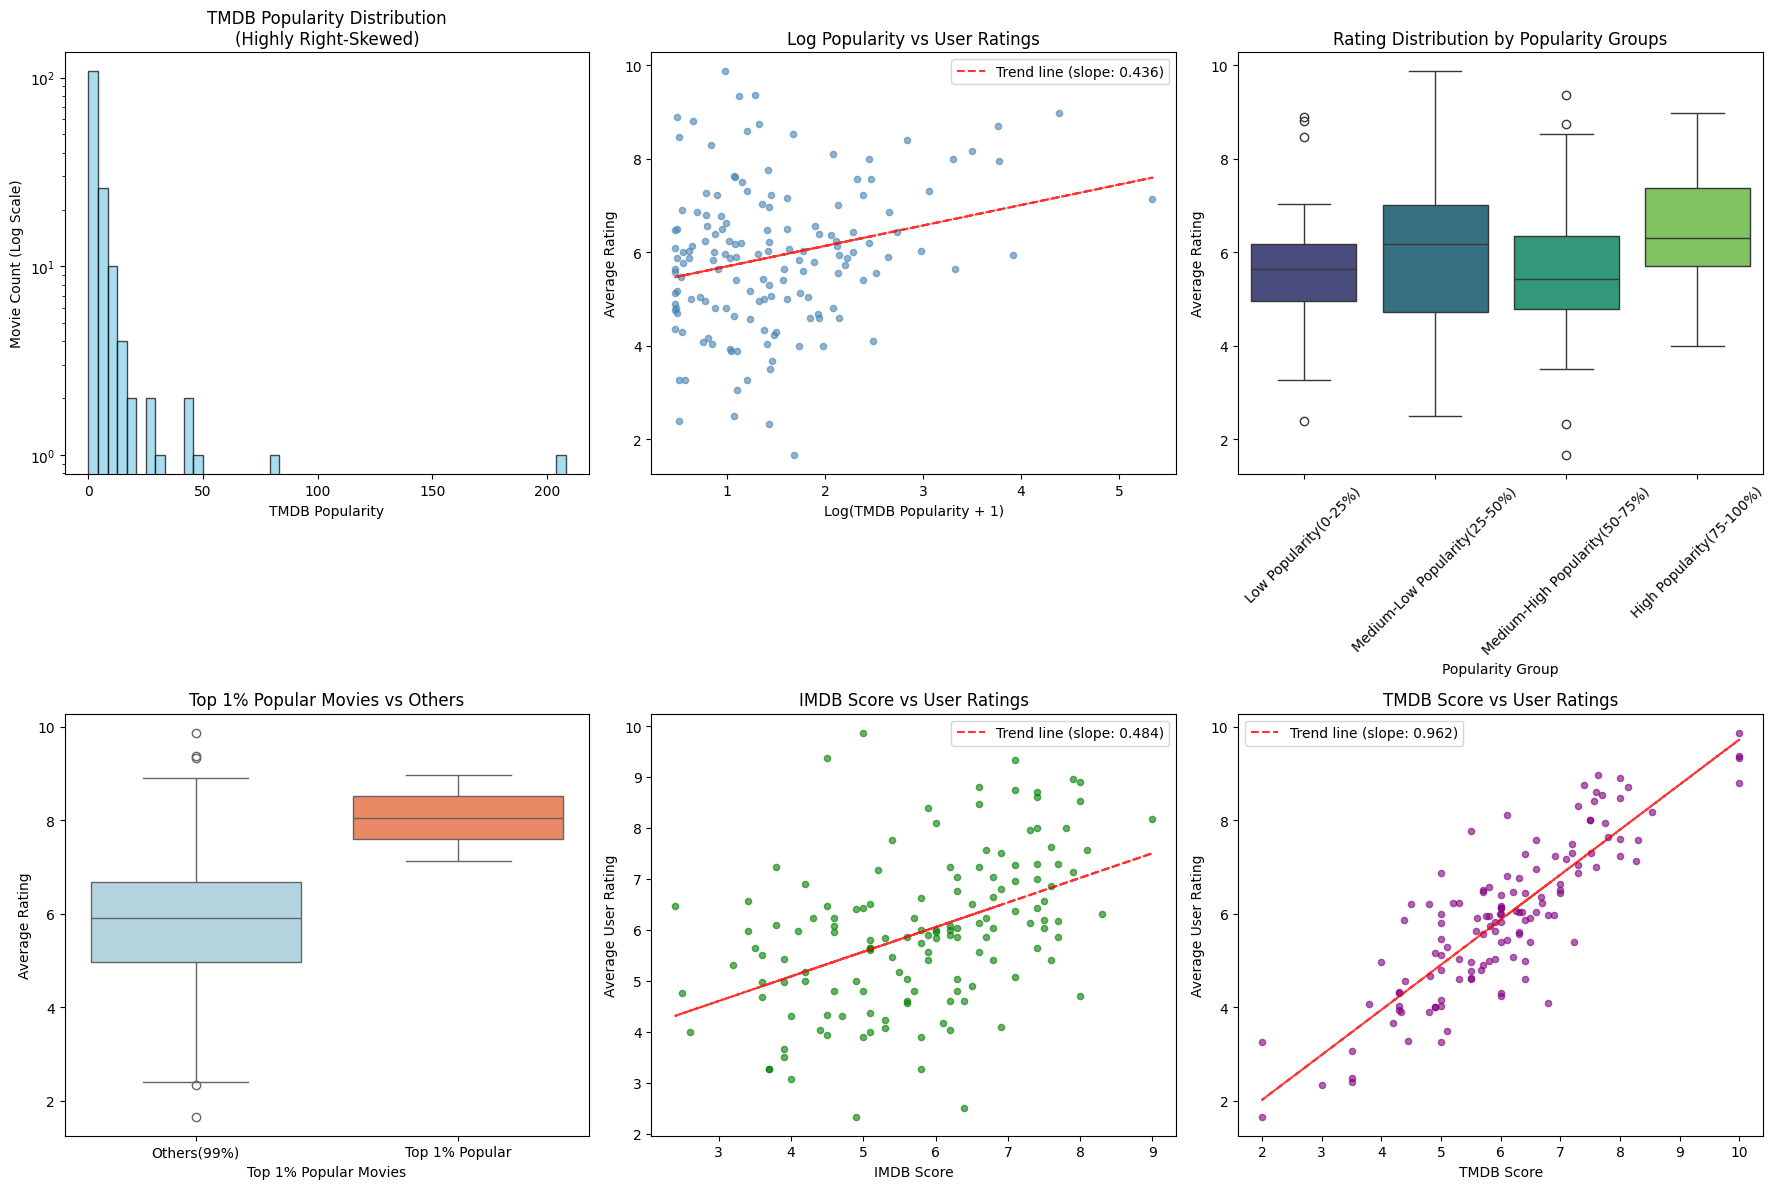


=== STATISTICAL ANALYSIS ===

Rating Statistics by Popularity Groups:
                                count   mean    std
pop_group                                          
Low Popularity(0-25%)              40  5.645  1.339
Medium-Low Popularity(25-50%)      39  5.983  1.693
Medium-High Popularity(50-75%)     39  5.568  1.597
High Popularity(75-100%)           40  6.452  1.266

TMDB Popularity vs User Ratings Correlation:
Pearson correlation (log popularity vs ratings): 0.248 (p-value: 0.002)
Spearman correlation (raw popularity vs ratings): 0.181 (p-value: 0.027)
IMDB Score vs User Ratings correlation: 0.454 (p-value: 0.000)
TMDB Score vs User Ratings correlation: 0.852 (p-value: 0.000)

ANOVA Test - Rating Differences Across Popularity Groups:
F-statistic: 2.938, P-value: 0.035
Conclusion: Significant rating differences exist across popularity groups

Extreme Value Analysis (Top 1% Popular Movies):
           count   mean    std
is_top_1%                     
False        156  5.8

In [68]:
def analyze_movie_popularity_vs_ratings(movies_df, ratings_df):
    """
    Dimension 1: Movie Popularity vs Ratings Analysis
    """
    print("=" * 60)
    print("DIMENSION 1: MOVIE POPULARITY VS RATINGS ANALYSIS")
    print("=" * 60)
    
    # Check data columns
    print("Movies table columns:", movies_df.columns.tolist())
    print("Ratings table columns:", ratings_df.columns.tolist())
    
    # Data preprocessing
    movie_stats = movies_df.copy()
    
    # Calculate average rating and rating count for each movie
    rating_stats = ratings_df.groupby('Movie_id')['Rating_Value'].agg(['mean', 'count']).reset_index()
    rating_stats.columns = ['Movie_id', 'avg_rating', 'rating_count']
    
    # Merge data
    movie_stats = movie_stats.merge(rating_stats, on='Movie_id', how='left')
    
    # Handle missing values
    movie_stats['avg_rating'] = movie_stats['avg_rating'].fillna(0)
    movie_stats['rating_count'] = movie_stats['rating_count'].fillna(0)
    movie_stats['Tmdb_Popularity'] = movie_stats['Tmdb_Popularity'].fillna(0)
    
    # Filter movies with at least 3 ratings for reliability
    analysis_data = movie_stats[movie_stats['rating_count'] >= 3].copy()
    
    print(f"Total movies: {len(movies_df)}")
    print(f"Movies with ≥3 ratings: {len(analysis_data)}")
    print(f"TMDB Popularity Statistics:")
    print(f"  Range: {analysis_data['Tmdb_Popularity'].min():.3f} - {analysis_data['Tmdb_Popularity'].max():.3f}")
    print(f"  Median: {analysis_data['Tmdb_Popularity'].median():.3f}")
    print(f"  Mean: {analysis_data['Tmdb_Popularity'].mean():.3f}")
    print(f"  75th percentile: {analysis_data['Tmdb_Popularity'].quantile(0.75):.3f}")
    
    # Apply log transformation for highly skewed data
    analysis_data['log_popularity'] = np.log1p(analysis_data['Tmdb_Popularity'])
    
    # Create visualizations
    plt.figure(figsize=(18, 12))
    
    # Subplot 1: Original popularity distribution (log scale)
    plt.subplot(2, 3, 1)
    plt.hist(analysis_data['Tmdb_Popularity'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
    plt.yscale('log')
    plt.xlabel('TMDB Popularity')
    plt.ylabel('Movie Count (Log Scale)')
    plt.title('TMDB Popularity Distribution\n(Highly Right-Skewed)')
    
    # Subplot 2: Log-transformed popularity vs ratings
    plt.subplot(2, 3, 2)
    valid_data = analysis_data[
        (analysis_data['Tmdb_Popularity'] > 0) & 
        (analysis_data['avg_rating'] > 0)
    ]
    
    plt.scatter(valid_data['log_popularity'], valid_data['avg_rating'], 
                alpha=0.6, color='steelblue', s=20)
    plt.xlabel('Log(TMDB Popularity + 1)')
    plt.ylabel('Average Rating')
    plt.title('Log Popularity vs User Ratings')
    
    # Add trend line
    if len(valid_data) > 1:
        z = np.polyfit(valid_data['log_popularity'], valid_data['avg_rating'], 1)
        p = np.poly1d(z)
        plt.plot(valid_data['log_popularity'], p(valid_data['log_popularity']), "r--", alpha=0.8, 
                label=f"Trend line (slope: {z[0]:.3f})")
        plt.legend()
    
    # Subplot 3: Rating comparison by popularity groups (quantile-based)
    plt.subplot(2, 3, 3)
    
    # Create groups using quantiles
    pop_25 = analysis_data['Tmdb_Popularity'].quantile(0.25)
    pop_50 = analysis_data['Tmdb_Popularity'].quantile(0.50)
    pop_75 = analysis_data['Tmdb_Popularity'].quantile(0.75)
    
    def categorize_popularity(pop):
        if pop <= pop_25:
            return 'Low Popularity(0-25%)'
        elif pop <= pop_50:
            return 'Medium-Low Popularity(25-50%)'
        elif pop <= pop_75:
            return 'Medium-High Popularity(50-75%)'
        else:
            return 'High Popularity(75-100%)'
    
    analysis_data['pop_group'] = analysis_data['Tmdb_Popularity'].apply(categorize_popularity)
    
    # Order groups
    group_order = ['Low Popularity(0-25%)', 'Medium-Low Popularity(25-50%)', 
                   'Medium-High Popularity(50-75%)', 'High Popularity(75-100%)']
    analysis_data['pop_group'] = pd.Categorical(analysis_data['pop_group'], categories=group_order, ordered=True)
    
    # Fixed boxplot - using hue parameter correctly
    sns.boxplot(data=analysis_data, x='pop_group', y='avg_rating', hue='pop_group', 
                palette='viridis', legend=False)
    plt.xlabel('Popularity Group')
    plt.ylabel('Average Rating')
    plt.title('Rating Distribution by Popularity Groups')
    plt.xticks(rotation=45)
    
    # Subplot 4: Extreme value analysis - top 1% popular movies vs others
    plt.subplot(2, 3, 4)
    pop_99 = analysis_data['Tmdb_Popularity'].quantile(0.99)
    analysis_data['is_top_1%'] = analysis_data['Tmdb_Popularity'] >= pop_99
    
    # Fixed boxplot - using hue parameter correctly
    sns.boxplot(data=analysis_data, x='is_top_1%', y='avg_rating', hue='is_top_1%',
                palette=['lightblue', 'coral'], legend=False)
    plt.xlabel('Top 1% Popular Movies')
    plt.ylabel('Average Rating')
    plt.title('Top 1% Popular Movies vs Others')
    plt.xticks([0, 1], ['Others(99%)', 'Top 1% Popular'])
    
    # Subplot 5: IMDB Score vs User Ratings
    plt.subplot(2, 3, 5)
    imdb_valid = analysis_data[
        (analysis_data['Imdb_Score'] > 0) & 
        (analysis_data['avg_rating'] > 0)
    ]
    
    if len(imdb_valid) > 0:
        plt.scatter(imdb_valid['Imdb_Score'], imdb_valid['avg_rating'], 
                    alpha=0.6, color='green', s=20)
        plt.xlabel('IMDB Score')
        plt.ylabel('Average User Rating')
        plt.title('IMDB Score vs User Ratings')
        
        # Add trend line
        if len(imdb_valid) > 1:
            z = np.polyfit(imdb_valid['Imdb_Score'], imdb_valid['avg_rating'], 1)
            p = np.poly1d(z)
            plt.plot(imdb_valid['Imdb_Score'], p(imdb_valid['Imdb_Score']), "r--", alpha=0.8,
                    label=f"Trend line (slope: {z[0]:.3f})")
            plt.legend()
    
    # Subplot 6: TMDB Score vs User Ratings
    plt.subplot(2, 3, 6)
    tmdb_valid = analysis_data[
        (analysis_data['Tmdb_Score'] > 0) & 
        (analysis_data['avg_rating'] > 0)
    ]
    
    if len(tmdb_valid) > 0:
        plt.scatter(tmdb_valid['Tmdb_Score'], tmdb_valid['avg_rating'], 
                    alpha=0.6, color='purple', s=20)
        plt.xlabel('TMDB Score')
        plt.ylabel('Average User Rating')
        plt.title('TMDB Score vs User Ratings')
        
        # Add trend line
        if len(tmdb_valid) > 1:
            z = np.polyfit(tmdb_valid['Tmdb_Score'], tmdb_valid['avg_rating'], 1)
            p = np.poly1d(z)
            plt.plot(tmdb_valid['Tmdb_Score'], p(tmdb_valid['Tmdb_Score']), "r--", alpha=0.8,
                    label=f"Trend line (slope: {z[0]:.3f})")
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests and correlation analysis
    print(f"\n=== STATISTICAL ANALYSIS ===")
    
    # 1. Group statistics - fixed with observed=True
    print("\nRating Statistics by Popularity Groups:")
    group_stats = analysis_data.groupby('pop_group', observed=True)['avg_rating'].agg(['count', 'mean', 'std']).round(3)
    print(group_stats)
    
    # 2. Correlation analysis
    if len(valid_data) > 1:
        # TMDB Popularity vs User Ratings correlation
        pearson_corr = stats.pearsonr(valid_data['log_popularity'], valid_data['avg_rating'])
        spearman_corr = stats.spearmanr(valid_data['Tmdb_Popularity'], valid_data['avg_rating'])
        
        print(f"\nTMDB Popularity vs User Ratings Correlation:")
        print(f"Pearson correlation (log popularity vs ratings): {pearson_corr[0]:.3f} (p-value: {pearson_corr[1]:.3f})")
        print(f"Spearman correlation (raw popularity vs ratings): {spearman_corr[0]:.3f} (p-value: {spearman_corr[1]:.3f})")
    
    # 3. IMDB Score vs User Ratings correlation
    if len(imdb_valid) > 1:
        imdb_corr = stats.pearsonr(imdb_valid['Imdb_Score'], imdb_valid['avg_rating'])
        print(f"IMDB Score vs User Ratings correlation: {imdb_corr[0]:.3f} (p-value: {imdb_corr[1]:.3f})")
    
    # 4. TMDB Score vs User Ratings correlation
    if len(tmdb_valid) > 1:
        tmdb_corr = stats.pearsonr(tmdb_valid['Tmdb_Score'], tmdb_valid['avg_rating'])
        print(f"TMDB Score vs User Ratings correlation: {tmdb_corr[0]:.3f} (p-value: {tmdb_corr[1]:.3f})")
    
    # 5. ANOVA test for group differences - fixed with observed=True
    print(f"\nANOVA Test - Rating Differences Across Popularity Groups:")
    anova_groups = [group['avg_rating'].values for name, group in analysis_data.groupby('pop_group', observed=True)]
    
    if all(len(group) > 1 for group in anova_groups):
        f_stat, p_value = stats.f_oneway(*anova_groups)
        print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")
        
        if p_value < 0.05:
            print("Conclusion: Significant rating differences exist across popularity groups")
        else:
            print("Conclusion: No significant rating differences across popularity groups")
    
    # 6. Extreme value analysis - fixed with observed=True
    top_1_stats = analysis_data.groupby('is_top_1%', observed=True)['avg_rating'].agg(['count', 'mean', 'std']).round(3)
    print(f"\nExtreme Value Analysis (Top 1% Popular Movies):")
    print(top_1_stats)
    
    # 7. Popularity analysis by movie type - fixed with observed=True
    if 'Type' in analysis_data.columns:
        print(f"\nPopularity Analysis by Movie Type:")
        type_stats = analysis_data.groupby('Type', observed=True).agg({
            'Tmdb_Popularity': ['count', 'mean', 'median'],
            'avg_rating': 'mean'
        }).round(3)
        print(type_stats)
    
    return analysis_data
result = analyze_movie_popularity_vs_ratings(movies, ratings)

In [1]:
from graphviz import Digraph
from IPython.display import Image, display

# 创建有向图
dot = Digraph(comment='TBC Production Workflow')
dot.attr(rankdir='TB', size='10,8')

# 设置全局样式
dot.attr('node', shape='rect', style='rounded,filled', 
         color='lightblue2', fontname='Arial', fontsize='10')
dot.attr('edge', color='gray50', arrowhead='normal')

# 定义四个主要阶段
stages = [
    ('S1', 'Stage 1: Intelligent Field Capture'),
    ('S2', 'Stage 2: AI Processing & Classification'),
    ('S3', 'Stage 3: Human Curation'), 
    ('S4', 'Stage 4: Distribution & Application')
]

# 添加阶段节点
for stage_id, stage_label in stages:
    dot.node(stage_id, stage_label, shape='ellipse', style='filled', 
             fillcolor='lightsteelblue', color='darkblue', fontsize='12')

# 添加阶段1的详细内容
dot.node('S1_A', 'Autonomous navigation and\noptimal positioning')
dot.node('S1_B', 'Real-time environmental analysis\n& solar charging')
dot.node('S1_C', 'Multi-format data capture\nwith quality assessment')

# 添加阶段2的详细内容  
dot.node('S2_A', 'Automated categorization by\nenvironment & content value')
dot.node('S2_B', 'Metadata generation &\noptimal sequence selection')
dot.node('S2_C', 'Quality grading and\ntechnical optimization')

# 添加阶段3的详细内容
dot.node('S3_A', 'Expert verification of\nauthenticity & ethical compliance')
dot.node('S3_B', 'Final quality assurance\n& content packaging')
dot.node('S3_C', 'Client-specific curation\nand preparation')

# 添加阶段4的详细内容
dot.node('S4_A', 'Licensing to media producers\nand streaming services')
dot.node('S4_B', 'Providing data to research\nand educational institutions') 
dot.node('S4_C', 'Developing in-house\ndocumentary content')

# 连接主流程
dot.edges(['S1>S2', 'S2>S3', 'S3>S4'])

# 连接各阶段的详细任务（使用不可见边来组织布局）
with dot.subgraph() as s:
    s.attr(rank='same')
    for stage in ['S1', 'S2', 'S3', 'S4']:
        s.attr('edge', style='invis')
        for task in ['A', 'B', 'C']:
            dot.edge(stage, f'{stage}_{task}', style='invis')

# 在Jupyter中直接显示
dot

ValueError: too many values to unpack (expected 2)

In [2]:
from graphviz import Digraph

# 创建有向图
dot = Digraph(comment='TBC Production Workflow')
dot.attr(rankdir='TB', size='12,10')

# 设置全局样式
dot.attr('node', shape='rect', style='rounded,filled', 
         color='lightblue2', fontname='Arial', fontsize='10')
dot.attr('edge', color='darkblue', arrowhead='normal')

# 定义四个主要阶段（使用不同的颜色）
stages = {
    'S1': ('Stage 1: Intelligent Field Capture', 'lightsteelblue'),
    'S2': ('Stage 2: AI Processing & Classification', 'lightyellow'),
    'S3': ('Stage 3: Human Curation', 'lightgreen'), 
    'S4': ('Stage 4: Distribution & Application', 'lightcoral')
}

# 添加阶段节点
for stage_id, (stage_label, color) in stages.items():
    dot.node(stage_id, stage_label, shape='ellipse', style='filled', 
             fillcolor=color, color='darkblue', fontsize='12', fontname='Arial')

# 添加详细任务节点
tasks = {
    'S1_A': 'Autonomous navigation and\noptimal positioning',
    'S1_B': 'Real-time environmental analysis\n& solar charging',
    'S1_C': 'Multi-format data capture\nwith quality assessment',
    
    'S2_A': 'Automated categorization by\nenvironment & content value',
    'S2_B': 'Metadata generation &\noptimal sequence selection', 
    'S2_C': 'Quality grading and\ntechnical optimization',
    
    'S3_A': 'Expert verification of\nauthenticity & ethical compliance',
    'S3_B': 'Final quality assurance\n& content packaging',
    'S3_C': 'Client-specific curation\nand preparation',
    
    'S4_A': 'Licensing to media producers\nand streaming services',
    'S4_B': 'Providing data to research\nand educational institutions',
    'S4_C': 'Developing in-house\ndocumentary content'
}

for task_id, task_label in tasks.items():
    dot.node(task_id, task_label, fillcolor='ghostwhite', color='gray', fontsize='9')

# 连接主流程（修正后的正确语法）
dot.edge('S1', 'S2')
dot.edge('S2', 'S3')
dot.edge('S3', 'S4')

# 连接各阶段到其任务
for stage in ['S1', 'S2', 'S3', 'S4']:
    for task in ['A', 'B', 'C']:
        dot.edge(stage, f'{stage}_{task}')

# 添加开始和结束节点
dot.node('Start', 'Start', shape='circle', style='filled', fillcolor='palegreen')
dot.node('End', 'End', shape='circle', style='filled', fillcolor='lightcoral')
dot.edge('Start', 'S1')
dot.edge('S4', 'End')

# 在Jupyter中显示
dot

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [3]:
from graphviz import Digraph

# 创建简化版流程图
dot = Digraph()
dot.attr(rankdir='TB')

# 主要阶段
stages = [
    ('1', 'Intelligent Field Capture'),
    ('2', 'AI Processing & Classification'),
    ('3', 'Human Curation'),
    ('4', 'Distribution & Application')
]

# 添加阶段节点
for i, (num, name) in enumerate(stages):
    dot.node(f'S{num}', f'Stage {num}\n{name}', 
             shape='rect', style='rounded,filled',
             fillcolor='lightblue', fontsize='12')

# 连接阶段
for i in range(len(stages)-1):
    dot.edge(f'S{stages[i][0]}', f'S{stages[i+1][0]}')

# 添加详细任务作为子图
with dot.subgraph(name='cluster_tasks') as c:
    c.attr(style='dashed')
    tasks = [
        ('S1_A', '• Autonomous navigation\n• Environmental analysis\n• Multi-format capture'),
        ('S2_A', '• Automated categorization\n• Metadata generation\n• Quality grading'),
        ('S3_A', '• Expert verification\n• Quality assurance\n• Client preparation'),
        ('S4_A', '• Media licensing\n• Research data\n• Documentary content')
    ]
    
    for task_id, task_desc in tasks:
        c.node(task_id, task_desc, shape='box', style='filled',
               fillcolor='lightyellow', fontsize='9')
        
        # 连接阶段到其任务
        stage_num = task_id.split('_')[0][1:]
        dot.edge(f'S{stage_num}', task_id, style='dashed', color='gray')

dot

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [4]:
from graphviz import Digraph

dot = Digraph('TBC Workflow')
dot.attr(rankdir='TB')

# 直接使用正确的edge语法
dot.node('S1', 'Stage 1: Field Capture')
dot.node('S2', 'Stage 2: AI Processing') 
dot.node('S3', 'Stage 3: Human Curation')
dot.node('S4', 'Stage 4: Distribution')

# 正确的连接方式
dot.edge('S1', 'S2')
dot.edge('S2', 'S3')
dot.edge('S3', 'S4')

dot

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [5]:
!brew install graphviz

==> Fetching downloads for: graphviz
✔︎ Bottle jpeg-xl (0.11.1_3)                        [Downloaded   14.2MB/ 14.2MB]
✔︎ Bottle libvmaf (3.0.0)                           [Downloaded    1.1MB/  1.1MB]
✔︎ Bottle aom (3.13.1)                              [Downloaded    4.1MB/  4.1MB]
✔︎ Bottle dav1d (1.5.2)                             [Downloaded  360.2KB/360.2KB]
✔︎ Bottle libavif (1.3.0)                           [Downloaded  318.7KB/318.7KB]
✔︎ Bottle gd (2.3.3_6)                              [Downloaded  310.1KB/310.1KB]
✔︎ Bottle jasper (4.2.8)                            [Downloaded  480.7KB/480.7KB]
✔︎ Bottle netpbm (11.02.19_1)                       [Downloaded    2.6MB/  2.6MB]
✔︎ Bottle gts (0.7.6_3)                             [Downloaded  408.0KB/408.0KB]
✔︎ Bottle gdk-pixbuf (2.44.4)                       [Downloaded  779.3KB/779.3KB]
✔︎ Bottle graphite2 (1.3.14)                        [Downloaded   92.5KB/ 92.5KB]
✔︎ Bottle icu4c@78 (78.1)                           [Download

In [17]:
# 简单的文本流程图
def print_text_workflow():
    stages = [
        "START",
        "↓",
        "Stage 1: Intelligent Field Capture",
        "  ├── Autonomous navigation",
        "  ├── Environmental analysis", 
        "  └── Multi-format capture",
        "↓",
        "Stage 2: AI Processing & Classification",
        "  ├── Automated categorization",
        "  ├── Metadata generation",
        "  └── Quality grading",
        "↓", 
        "Stage 3: Human Curation",
        "  ├── Expert verification",
        "  ├── Quality assurance",
        "  └── Client preparation",
        "↓",
        "Stage 4: Distribution & Application", 
        "  ├── Media licensing",
        "  ├── Research data",
        "  └── Documentary content",
        "↓",
        "END"
    ]
    
    print("TBC PRODUCTION WORKFLOW")
    print("=" * 40)
    for line in stages:
        print(line)

print_text_workflow()

TBC PRODUCTION WORKFLOW
START
↓
Stage 1: Intelligent Field Capture
  ├── Autonomous navigation
  ├── Environmental analysis
  └── Multi-format capture
↓
Stage 2: AI Processing & Classification
  ├── Automated categorization
  ├── Metadata generation
  └── Quality grading
↓
Stage 3: Human Curation
  ├── Expert verification
  ├── Quality assurance
  └── Client preparation
↓
Stage 4: Distribution & Application
  ├── Media licensing
  ├── Research data
  └── Documentary content
↓
END
